In [3]:
# Install required libraries (uncomment if not already installed)
# !pip install matplotlib seaborn plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data
df = pd.read_csv(r"C:\Users\debjo\Downloads\Mental_Health_Dataset_Updated.csv")


# Drop the empty column
df.drop(columns=['Unnamed: 18'], inplace=True)

# Display the first few rows
df.head()


,Date,Time,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014,11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014,11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014,11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014,11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014,11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


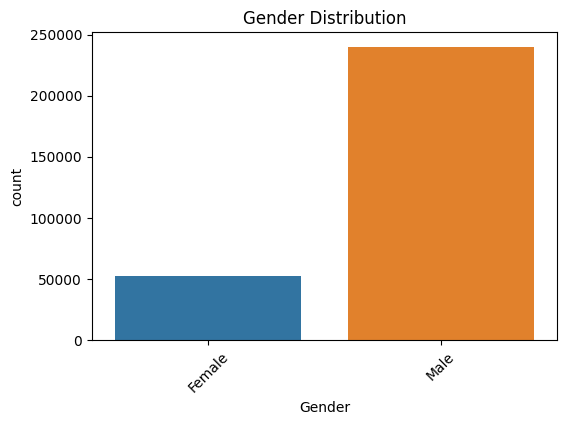

In [4]:
# Count of each gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

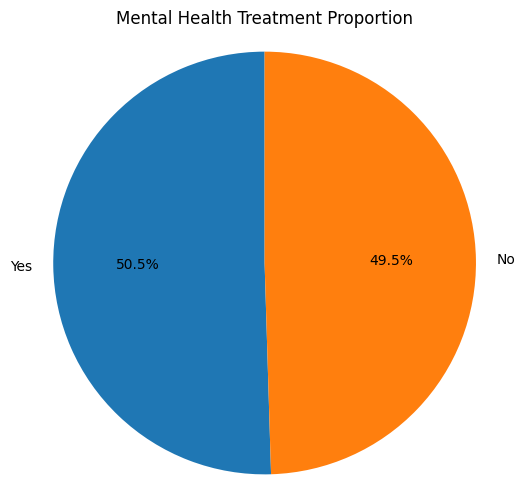

In [5]:
# Treatment distribution
treatment_counts = df['treatment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mental Health Treatment Proportion')
plt.axis('equal')
plt.show()


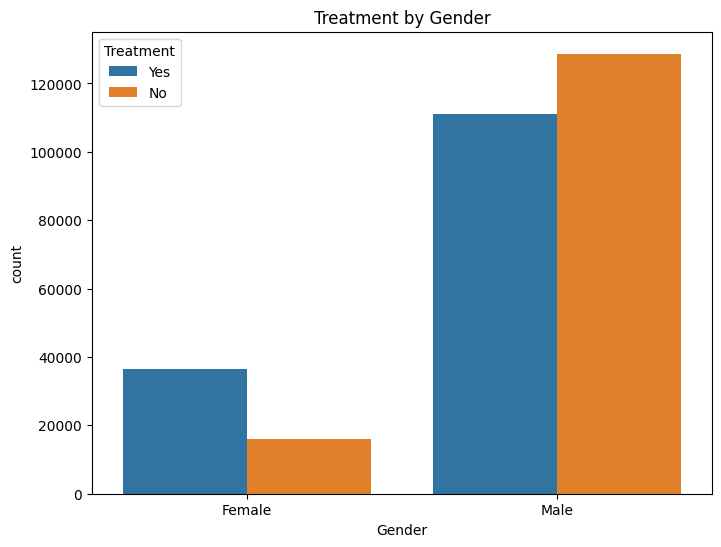

In [14]:
# Treatment count by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title('Treatment by Gender')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.show()


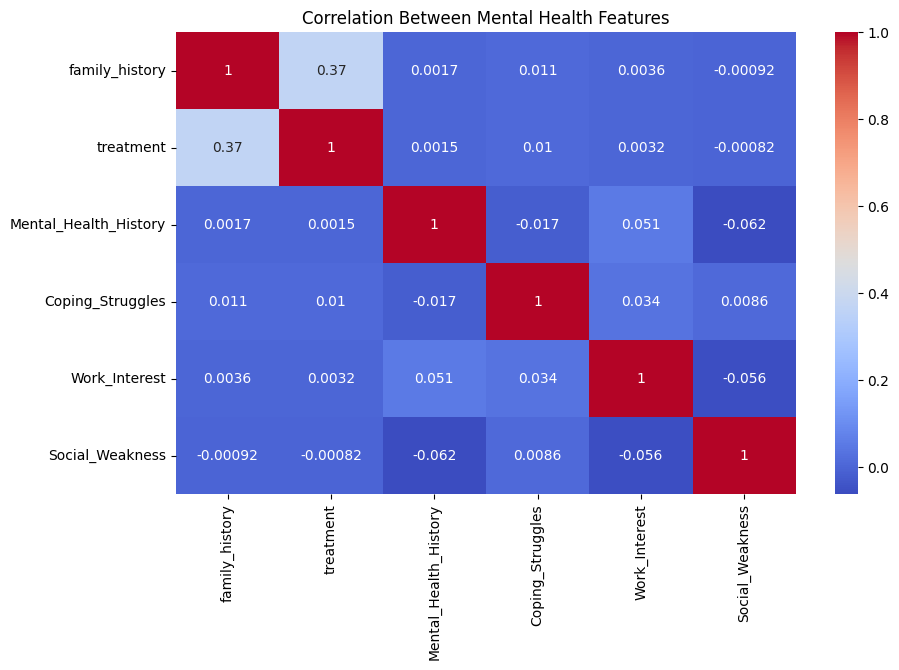

In [10]:
# Convert binary/categorical to numerical for heatmap
# Step 1: Convert categorical data to numerical
binary_df = df.replace({'Yes': 1, 'No': 0, 'Maybe': 0.5})
binary_df = df.replace({'Yes': 1, 'No': 0, 'Maybe': 0.5})
selected = ['family_history', 'treatment', 'Mental_Health_History', 'Mood_Swings',
            'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

plt.figure(figsize=(10, 6))
sns.heatmap(binary_df[selected].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Mental Health Features')
plt.show()


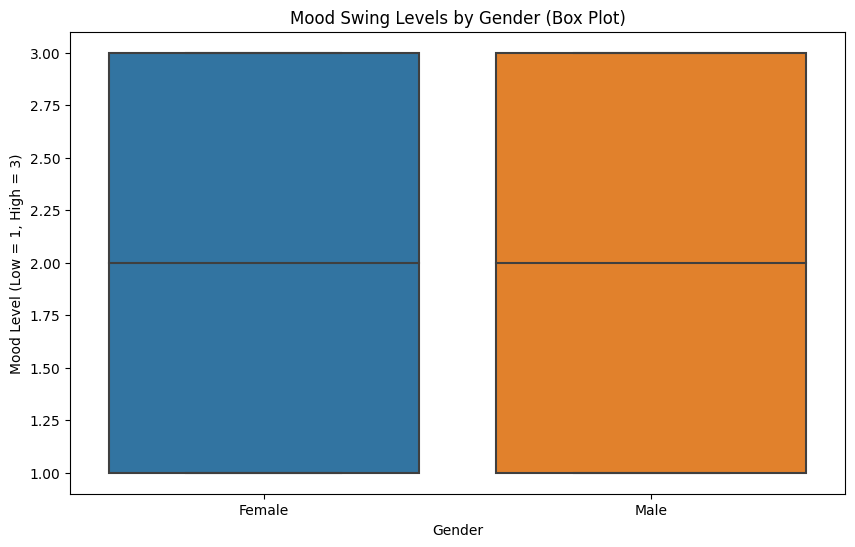

In [12]:
# Use only rows with clear mood swing values
df_box = df[df['Mood_Swings'].isin(['Low', 'Medium', 'High'])]

# Map mood levels to numeric scale
mood_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_box['Mood_Swings_Num'] = df_box['Mood_Swings'].map(mood_map)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x='Gender', y='Mood_Swings_Num')
plt.title('Mood Swing Levels by Gender (Box Plot)')
plt.ylabel('Mood Level (Low = 1, High = 3)')
plt.show()

Female respondents have a slightly higher average mood swing level (2.00)
Male respondents have a slightly lower average (1.96)

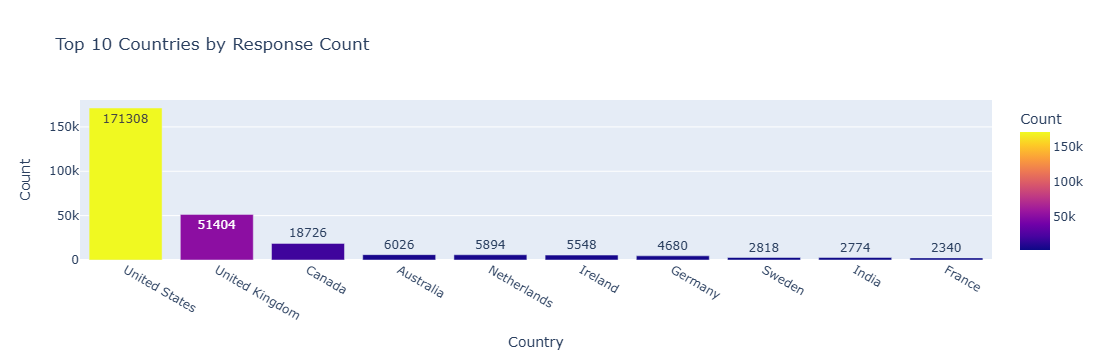

In [17]:
# Interactive bar chart of top countries
top_countries = df['Country'].value_counts().nlargest(10).reset_index()
top_countries.columns = ['Country', 'Count']

fig = px.bar(top_countries, x='Country', y='Count',
             title='Top 10 Countries by Response Count',
             color='Count', text='Count')
fig.show()


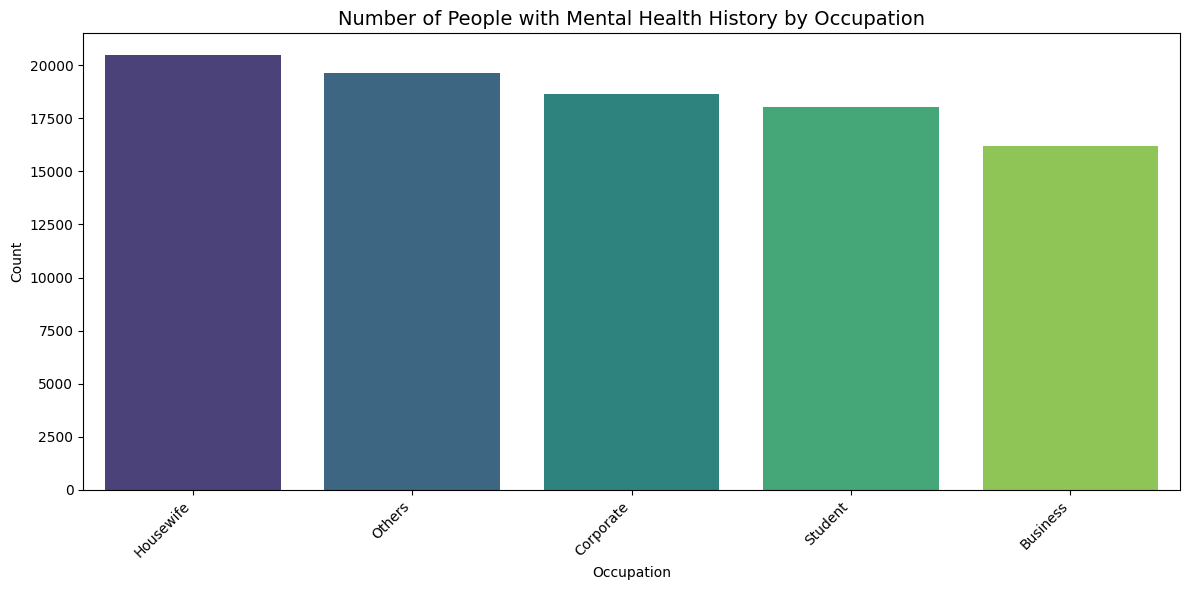

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only rows where Mental_Health_History is 'Yes'
mental_health_by_occupation = df[df['Mental_Health_History'] == 'Yes']['Occupation'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=mental_health_by_occupation.index, y=mental_health_by_occupation.values, palette='viridis')
plt.title('Number of People with Mental Health History by Occupation', fontsize=14)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


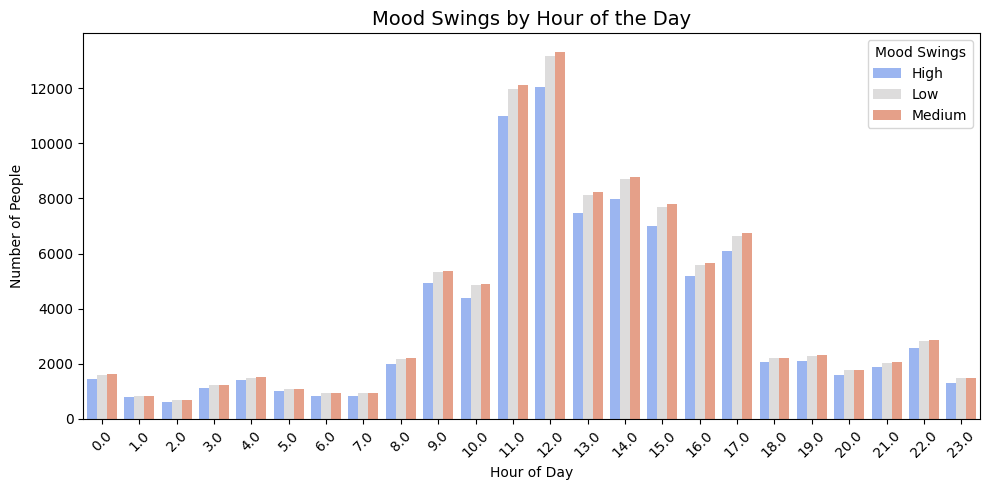

In [32]:
# Convert 'Time' column to datetime format to extract the hour
# Convert 'Time' column to datetime format to extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

# Extract hour from time
df['Hour'] = df['Time'].dt.hour

# Group by hour and mood swings, then count
mood_swing_by_hour = df.groupby(['Hour', 'Mood_Swings']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=mood_swing_by_hour, x='Hour', y='Count', hue='Mood_Swings', palette='coolwarm')  # Changed palette here
plt.title('Mood Swings by Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Mood Swings')
plt.tight_layout()
plt.show()
